## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4            Y
0  65.605066  1658.592333  0.635974  10.323814  1056.786282
1  22.095413   584.736979  0.820123   6.607620   479.962822
2  88.793123   704.207964  0.759400   6.387293   542.042484
3   6.015608  1162.544672  0.158344   8.841344   184.035967
4  82.616102  1600.531462  0.921773   6.354308  1477.536111


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0528028	total: 58ms	remaining: 57.9s
1:	learn: 1.0389249	total: 58.6ms	remaining: 29.2s
2:	learn: 1.0269125	total: 59.2ms	remaining: 19.7s
3:	learn: 1.0129328	total: 59.8ms	remaining: 14.9s
4:	learn: 0.9986991	total: 60.5ms	remaining: 12s
5:	learn: 0.9863781	total: 61.2ms	remaining: 10.1s
6:	learn: 0.9706043	total: 61.7ms	remaining: 8.75s
7:	learn: 0.9550126	total: 62.3ms	remaining: 7.73s
8:	learn: 0.9410319	total: 63ms	remaining: 6.94s
9:	learn: 0.9275380	total: 63.5ms	remaining: 6.29s
10:	learn: 0.9140714	total: 64.1ms	remaining: 5.76s
11:	learn: 0.8995804	total: 65.4ms	remaining: 5.38s
12:	learn: 0.8878176	total: 66.1ms	remaining: 5.02s
13:	learn: 0.8766573	total: 66.9ms	remaining: 4.71s
14:	learn: 0.8648661	total: 67.5ms	remaining: 4.43s
15:	learn: 0.8537180	total: 67.9ms	remaining: 4.17s
16:	learn: 0.8414532	total: 68.4ms	remaining: 3.96s
17:	learn: 0.8295896	total: 69ms	remaining: 3.76s
18:	learn: 0.8211788	total: 69.4ms	remaining: 3.58s


97:	learn: 0.3083918	total: 105ms	remaining: 966ms
98:	learn: 0.3050292	total: 106ms	remaining: 961ms
99:	learn: 0.3009587	total: 106ms	remaining: 955ms
100:	learn: 0.2973458	total: 107ms	remaining: 949ms
101:	learn: 0.2943671	total: 107ms	remaining: 942ms
102:	learn: 0.2914999	total: 107ms	remaining: 935ms
103:	learn: 0.2885139	total: 108ms	remaining: 930ms
104:	learn: 0.2860988	total: 108ms	remaining: 924ms
105:	learn: 0.2828175	total: 109ms	remaining: 918ms
106:	learn: 0.2791132	total: 109ms	remaining: 914ms
107:	learn: 0.2761116	total: 110ms	remaining: 908ms
108:	learn: 0.2729823	total: 110ms	remaining: 902ms
109:	learn: 0.2703062	total: 111ms	remaining: 897ms
110:	learn: 0.2678084	total: 111ms	remaining: 891ms
111:	learn: 0.2659137	total: 112ms	remaining: 886ms
112:	learn: 0.2632811	total: 112ms	remaining: 880ms
113:	learn: 0.2607447	total: 113ms	remaining: 875ms
114:	learn: 0.2571362	total: 113ms	remaining: 870ms
115:	learn: 0.2544196	total: 114ms	remaining: 865ms
116:	learn: 0.2

280:	learn: 0.0662894	total: 185ms	remaining: 474ms
281:	learn: 0.0659882	total: 186ms	remaining: 474ms
282:	learn: 0.0657265	total: 187ms	remaining: 473ms
283:	learn: 0.0654676	total: 187ms	remaining: 472ms
284:	learn: 0.0651621	total: 187ms	remaining: 470ms
285:	learn: 0.0648754	total: 188ms	remaining: 469ms
286:	learn: 0.0646002	total: 188ms	remaining: 467ms
287:	learn: 0.0643267	total: 189ms	remaining: 466ms
288:	learn: 0.0640945	total: 189ms	remaining: 465ms
289:	learn: 0.0637236	total: 189ms	remaining: 464ms
290:	learn: 0.0634045	total: 190ms	remaining: 463ms
291:	learn: 0.0631809	total: 190ms	remaining: 461ms
292:	learn: 0.0629410	total: 191ms	remaining: 460ms
293:	learn: 0.0626730	total: 191ms	remaining: 458ms
294:	learn: 0.0624217	total: 191ms	remaining: 457ms
295:	learn: 0.0621826	total: 192ms	remaining: 456ms
296:	learn: 0.0619713	total: 192ms	remaining: 455ms
297:	learn: 0.0616650	total: 193ms	remaining: 454ms
298:	learn: 0.0614205	total: 193ms	remaining: 453ms
299:	learn: 

501:	learn: 0.0277717	total: 286ms	remaining: 284ms
502:	learn: 0.0277286	total: 287ms	remaining: 284ms
503:	learn: 0.0276190	total: 287ms	remaining: 283ms
504:	learn: 0.0275949	total: 288ms	remaining: 282ms
505:	learn: 0.0274950	total: 288ms	remaining: 282ms
506:	learn: 0.0274482	total: 289ms	remaining: 281ms
507:	learn: 0.0274024	total: 289ms	remaining: 280ms
508:	learn: 0.0272840	total: 290ms	remaining: 279ms
509:	learn: 0.0272608	total: 290ms	remaining: 279ms
510:	learn: 0.0271286	total: 290ms	remaining: 278ms
511:	learn: 0.0271059	total: 291ms	remaining: 277ms
512:	learn: 0.0269918	total: 291ms	remaining: 276ms
513:	learn: 0.0269407	total: 292ms	remaining: 276ms
514:	learn: 0.0269187	total: 292ms	remaining: 275ms
515:	learn: 0.0267914	total: 293ms	remaining: 275ms
516:	learn: 0.0267678	total: 293ms	remaining: 274ms
517:	learn: 0.0266580	total: 294ms	remaining: 273ms
518:	learn: 0.0266089	total: 294ms	remaining: 272ms
519:	learn: 0.0264667	total: 294ms	remaining: 272ms
520:	learn: 

673:	learn: 0.0165968	total: 367ms	remaining: 178ms
674:	learn: 0.0165862	total: 368ms	remaining: 177ms
675:	learn: 0.0165548	total: 369ms	remaining: 177ms
676:	learn: 0.0165227	total: 369ms	remaining: 176ms
677:	learn: 0.0164911	total: 369ms	remaining: 175ms
678:	learn: 0.0164250	total: 370ms	remaining: 175ms
679:	learn: 0.0163681	total: 370ms	remaining: 174ms
680:	learn: 0.0163123	total: 370ms	remaining: 173ms
681:	learn: 0.0162813	total: 371ms	remaining: 173ms
682:	learn: 0.0162097	total: 371ms	remaining: 172ms
683:	learn: 0.0161793	total: 372ms	remaining: 172ms
684:	learn: 0.0161001	total: 372ms	remaining: 171ms
685:	learn: 0.0160211	total: 373ms	remaining: 171ms
686:	learn: 0.0159948	total: 373ms	remaining: 170ms
687:	learn: 0.0159652	total: 373ms	remaining: 169ms
688:	learn: 0.0159028	total: 374ms	remaining: 169ms
689:	learn: 0.0158736	total: 375ms	remaining: 168ms
690:	learn: 0.0158447	total: 375ms	remaining: 168ms
691:	learn: 0.0158162	total: 376ms	remaining: 167ms
692:	learn: 

872:	learn: 0.0098477	total: 465ms	remaining: 67.6ms
873:	learn: 0.0098095	total: 466ms	remaining: 67.2ms
874:	learn: 0.0097932	total: 467ms	remaining: 66.7ms
875:	learn: 0.0097556	total: 467ms	remaining: 66.1ms
876:	learn: 0.0097439	total: 468ms	remaining: 65.6ms
877:	learn: 0.0097070	total: 468ms	remaining: 65ms
878:	learn: 0.0096955	total: 469ms	remaining: 64.5ms
879:	learn: 0.0096593	total: 469ms	remaining: 64ms
880:	learn: 0.0096258	total: 470ms	remaining: 63.4ms
881:	learn: 0.0096004	total: 470ms	remaining: 62.9ms
882:	learn: 0.0095892	total: 470ms	remaining: 62.3ms
883:	learn: 0.0095846	total: 471ms	remaining: 61.8ms
884:	learn: 0.0095536	total: 471ms	remaining: 61.2ms
885:	learn: 0.0095386	total: 472ms	remaining: 60.7ms
886:	learn: 0.0095063	total: 472ms	remaining: 60.2ms
887:	learn: 0.0094879	total: 473ms	remaining: 59.7ms
888:	learn: 0.0094538	total: 474ms	remaining: 59.2ms
889:	learn: 0.0094164	total: 475ms	remaining: 58.7ms
890:	learn: 0.0093855	total: 475ms	remaining: 58.1

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

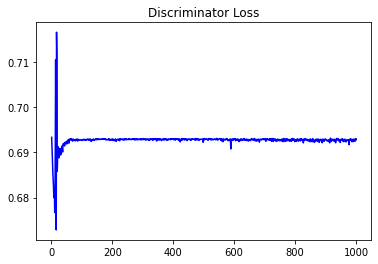

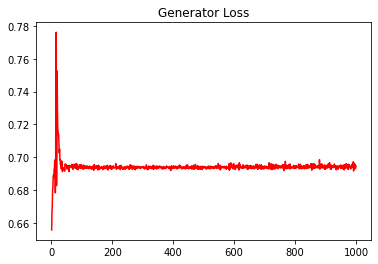

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.004334181254514733


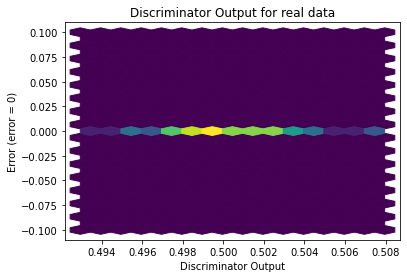

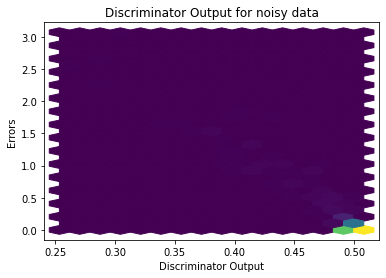

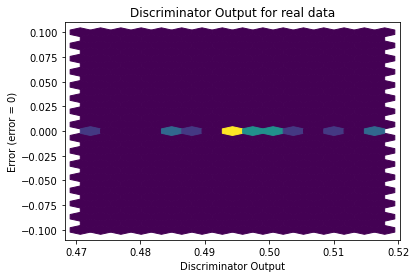

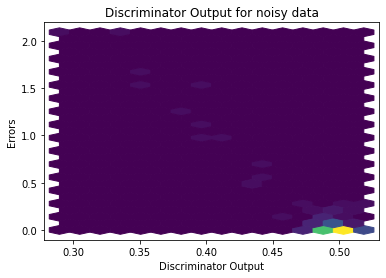

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


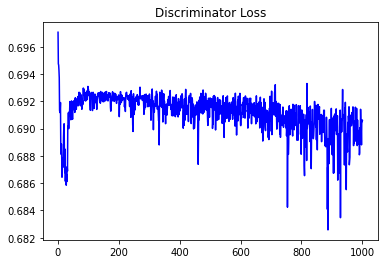

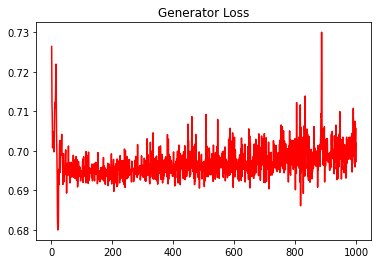

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.003076036850271763


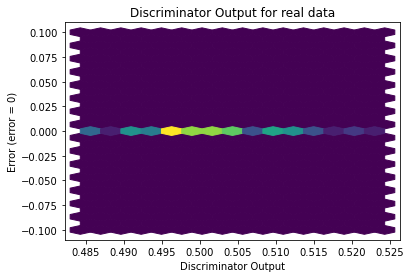

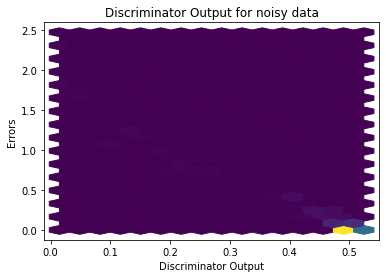

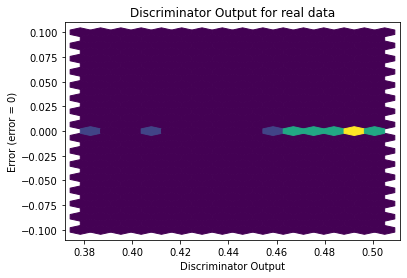

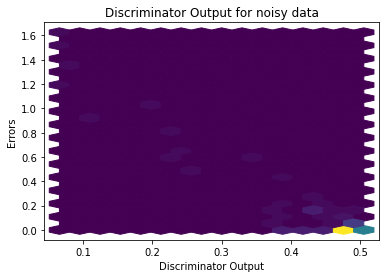

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1178]], requires_grad=True)
